# IMPORTING LIBRARIES

In [1]:
# import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans 

import warnings
warnings.filterwarnings('ignore')

# LOADING DATA

In [2]:
# import data
data=pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
#inspecting data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# CLEANING DATA

In this part:
- Cleaning data (missing values, duplicated values)
- Creating new features from existing data
- Changing some features for another meaningful ones
- Dropping unnecessary features


In [4]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#checking duplicated values
dups = data['ID'].duplicated().sum()
if dups >0:
    print (f'there are {dups} duplicates. ')
else:
    print('there are no duplicates')

there are no duplicates


Observations:
- There are 2240 entries with 29 attributes.
- There are some missing values in 'Income'
- datatype of Dt_Customer is not relevant
- No duplicated values are found in the dataset

Next, the following steps will be performed:
- Filling misising income with median value of the attribute
- Convert Dt_Customer into datetime dtype
- Change some column names
- Extract age from year_birth
- Group the Education to 3 main categories (undergraduate, graduate, and post graduate)
- Group the Marital_status to 2 main categories (Single and Relationship)
- Create Children attribute by combining kidhome and teenhome
- Create parenthood status (1: Yes, 0: No)
- Create Total_Expenses attribute by combining MntWines,MntFruits,MntMeatProducts,MntFishProducts, MntSweetProducts, MntGoldProds
- Drop unnecessary features

In [6]:
# fill in missing income with median value
data['Income'] = data['Income'].fillna(data['Income'].median())

In [7]:
#conver Dt_customer into datetime data type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [8]:
# Change some column names
data=data.rename(columns ={'MntWines':'Wines',
                           'MntFruits':'Fruits',
                           'MntMeatProducts':'Meat',
                           'MntFishProducts':'Fish', 
                           'MntSweetProducts':'Sweet', 
                           'MntGoldProds':'Gold'})

In [9]:
# Create age group column from year_birth
data['Age'] = 2022-data['Year_Birth']

#Select unique age and sort ascending
Age = data.Age.unique()
print(sorted(Age))

#Create Age Group
bins = [18,30,40,50,60,70,120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['Age_Group'] = pd.cut(data['Age'], bins, labels = labels, include_lowest = True)

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 122, 123, 129]


In [10]:
#Checking the unique values in Education
data['Education'].unique() 

#Group the Education 
data['Education']=data['Education'].replace({'Graduation':'Undergraduate',
                                             'PhD':'Postgraduate',
                                             'Master':'Postgraduate',
                                             'Basic':'Undergraduate',
                                             '2n Cycle': 'Graduate'})

In [11]:
#Checking the unique marital_status
data['Marital_Status'].unique()

 #Group the Marital_status
data['Marital_Status'] = data['Marital_Status'].replace({'Together': 'Relationship', 
                                                         'Married': 'Relationship', 
                                                         'Divorced': 'Single', 
                                                         'Widow':'Single', 
                                                         'Alone':'Single',
                                                         'Absurd':'Single',
                                                         'YOLO':'Single'})

In [12]:
#Create Children attribute
data['Children']=data['Kidhome']+data['Teenhome']

In [13]:
#Create parenthood status
data['Parenthood']=np.where(data['Children']>0,1,0)

In [14]:
#Create Total_Expenses
data['Total_Expenses']= data['Wines'] +data['Fruits']
+data['Meat']+data['Fish']+data['Gold']+data['Sweet']

0       894
1        15
2       301
3        38
4       206
       ... 
2235    589
2236     38
2237    285
2238    385
2239     85
Length: 2240, dtype: int64

In [15]:
#Create Days_Engaged
from datetime import date
data['recent_date'] = '2022-02-02'
data['recent_date']=pd.to_datetime(data['recent_date'])
data['Days_Engaged']= (data['recent_date']- data['Dt_Customer']).dt.days

In [16]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Children,Parenthood,Total_Expenses,recent_date,Days_Engaged
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,65,60-69,0,0,723,2022-02-02,3586
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,68,60-69,2,1,12,2022-02-02,2740
2,4141,1965,Undergraduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,3,11,0,57,50-59,0,0,475,2022-02-02,3087
3,6182,1984,Undergraduate,Relationship,26646.0,1,0,2014-10-02,26,11,...,3,11,0,38,30-39,1,1,15,2022-02-02,2680
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,3,11,0,41,40-49,1,1,216,2022-02-02,2936


In [17]:
#Drop unnecessary attributes
data= data.drop(['Year_Birth','Kidhome','Teenhome','Dt_Customer','Z_CostContact','Z_Revenue','recent_date'],axis = 1)

# Data PreProcessing

Firstly, the outliers will be detected and removed from the dataset

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Children          AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Parenthood        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Income                  AxesSubplot(0.125,0.125;0.227941x0.343182)
Days_Engaged         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Total_Expenses       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

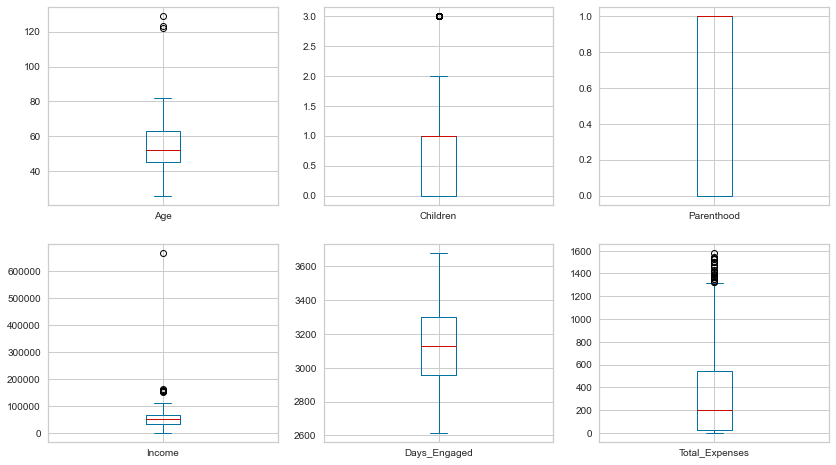

In [18]:
#Detecting Outliers
# select numerical data
df = data[['Age', 'Children','Parenthood', 'Income','Days_Engaged','Total_Expenses']]

df.plot(kind ='box',subplots = True,layout =(2,3),figsize=(14,8))

Observation:
- Clearly that there are few outliers in the Income and Age features. The outliers will be remove from the dataset as follow:

In [19]:
# Removing outliers
data.drop(data[(data['Income']>200000)|(data['Age']>100)].index,inplace=True)

print('the total number of rows after removing ouliers:', len(data))

the total number of rows after removing ouliers: 2236


Next, the correlation of the values will be checked

<AxesSubplot:>

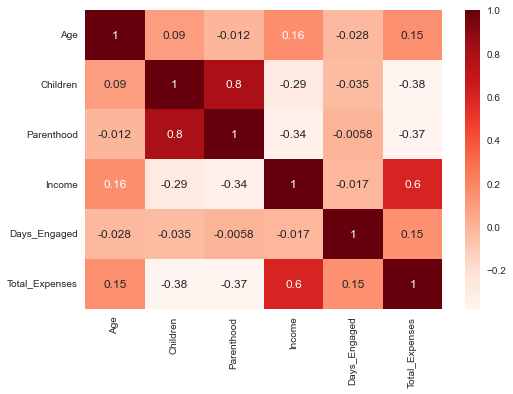

In [20]:
# Checking data correlation


# plot correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='Reds')

Observation:
- Income and Total Expenses has quite strong correlation (0.71)
- The data is quite clean to move forward

# EDA ANALYSIS

- Analysis on Age/ Education/ Marital_Status/ Children/ Income/ Expenses 
- Compare the amount of purchases in each product
- Total amount of purchases via channels
- Total number of acceptance in each promotion campaign
- Percentage of customer's complains


I use the combination of barchar and line chart to demonstrate the data distribution as well as the average income and spent regarding to each other attributes

Text(0, 0.5, 'Avg_Spent')

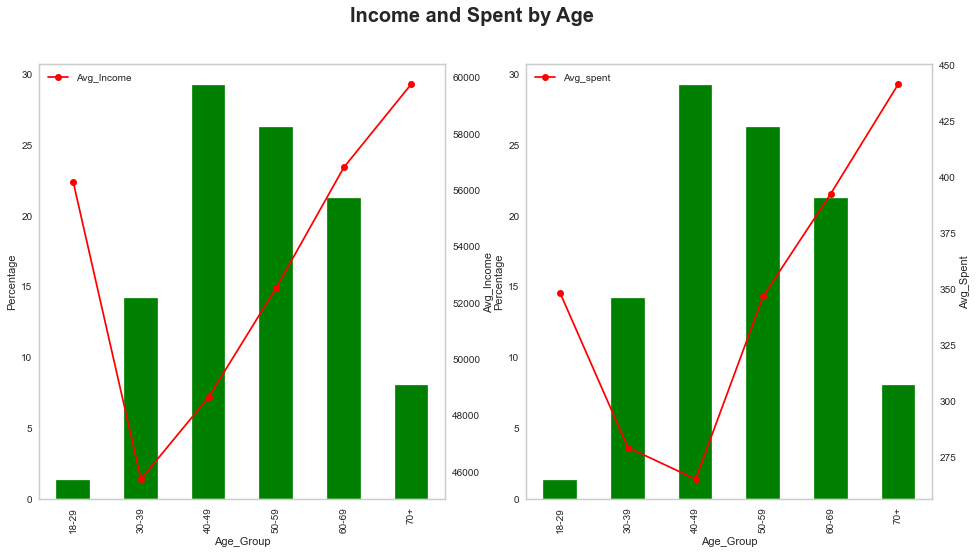

In [21]:
#Age distribution
#Define data
age = data.groupby('Age_Group').agg({'ID':'count','Income':'mean','Total_Expenses':'mean'}).reset_index()
age.rename(columns = {'ID': 'count','Income':'Avg_Income','Total_Expenses':'Avg_spent'},inplace = True)   
age['Percentage_count']=round(age['count']/sum(age['count'])*100,1)


sns.set_style("whitegrid", {'axes.grid' : False})
fig,axes= plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Income and Spent by Age', fontsize = 20, fontweight ='bold')

#sns barplot age vs income
ax= age.plot(kind ='bar',x= 'Age_Group', y='Percentage_count', color = 'green',legend = False,ax=axes[0])
ax2 = ax.twinx()
age.plot(x='Age_Group',y='Avg_Income', ax=ax2, legend = True, color='red', marker='o' )
ax.set_ylabel ('Percentage')
ax2.set_ylabel('Avg_Income')

#sns barplot age vs spent
ax1=age.plot(kind='bar',x='Age_Group',y='Percentage_count',legend = False, color = 'green',ax=axes[1])
ax3 = ax1.twinx()
age.plot(x='Age_Group',y='Avg_spent', ax=ax3, legend = True, color='red', marker='o' )
ax1.set_ylabel ('Percentage')
ax3.set_ylabel('Avg_Spent')



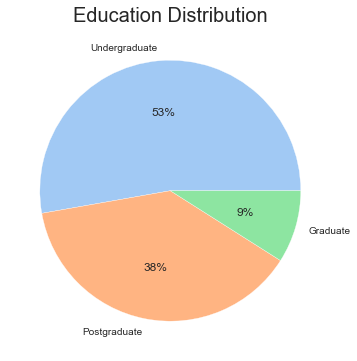

In [22]:
#checking number of unique categories in Education
Edu_data = data['Education'].value_counts()

# define sns color palette
labels = ['Undergraduate','Postgraduate','Graduate']
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.figure (figsize = (10,6))
plt.pie(Edu_data, labels = labels, colors = colors, autopct ='%.0f%%')
plt.title ('Education Distribution', fontsize =20)
plt.show()

Text(0, 0.5, 'Avg_Spent')

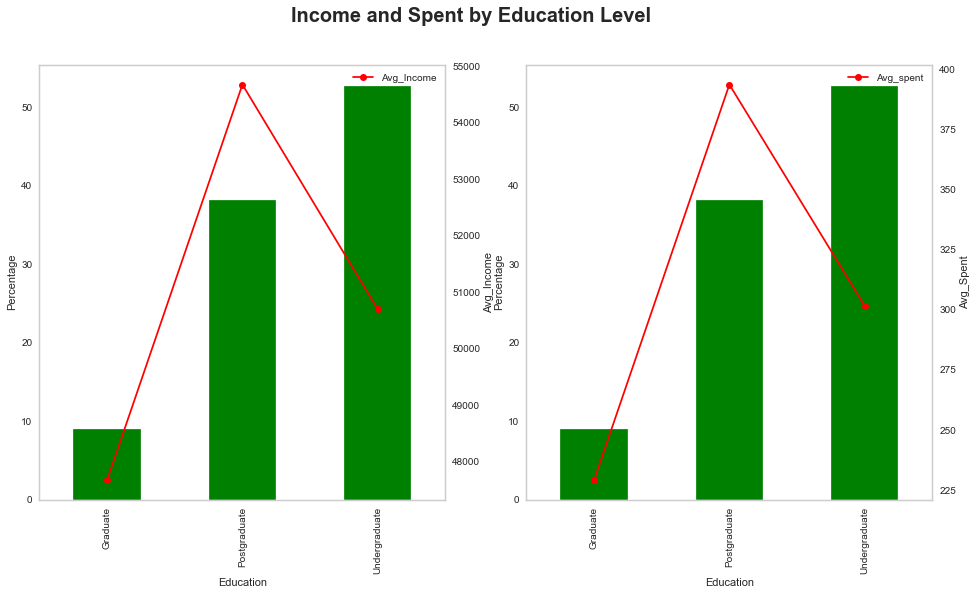

In [23]:
#Education distribution
#Define data
age = data.groupby('Education').agg({'ID':'count','Income':'mean','Total_Expenses':'mean'}).reset_index()
age.rename(columns = {'ID': 'count','Income':'Avg_Income','Total_Expenses':'Avg_spent'},inplace = True)   
age['Percentage_count']=round(age['count']/sum(age['count'])*100,1)


sns.set_style("whitegrid", {'axes.grid' : False})
fig,axes= plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Income and Spent by Education Level', fontsize = 20, fontweight ='bold')

#sns barplot age vs income
ax= age.plot(kind ='bar',x= 'Education', y='Percentage_count', color = 'green',legend = False,ax=axes[0])
ax2 = ax.twinx()
age.plot(x='Education',y='Avg_Income', ax=ax2, legend = True, color='red', marker='o' )
ax.set_ylabel ('Percentage')
ax2.set_ylabel('Avg_Income')

#sns barplot age vs spent
ax1=age.plot(kind='bar',x='Education',y='Percentage_count',legend = False, color = 'green',ax=axes[1])
ax3 = ax1.twinx()
age.plot(x='Education',y='Avg_spent', ax=ax3, legend = True, color='red', marker='o' )
ax1.set_ylabel ('Percentage')
ax3.set_ylabel('Avg_Spent')


Text(0, 0.5, 'Avg_Spent')

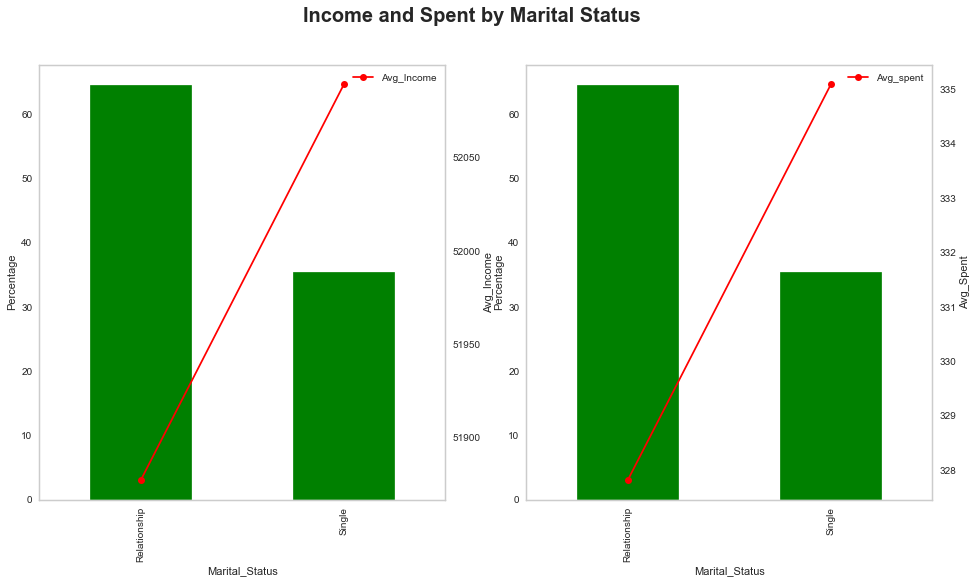

In [24]:
#Marital_Status distribution
#Define data
age = data.groupby('Marital_Status').agg({'ID':'count','Income':'mean','Total_Expenses':'mean'}).reset_index()
age.rename(columns = {'ID': 'count','Income':'Avg_Income','Total_Expenses':'Avg_spent'},inplace = True)   
age['Percentage_count']=round(age['count']/sum(age['count'])*100,1)


sns.set_style("whitegrid", {'axes.grid' : False})
fig,axes= plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Income and Spent by Marital Status', fontsize = 20, fontweight ='bold')

#sns barplot age vs income
ax= age.plot(kind ='bar',x= 'Marital_Status', y='Percentage_count', color = 'green',legend = False,ax=axes[0])
ax2 = ax.twinx()
age.plot(x='Marital_Status',y='Avg_Income', ax=ax2, legend = True, color='red', marker='o' )
ax.set_ylabel ('Percentage')
ax2.set_ylabel('Avg_Income')

#sns barplot age vs spent
ax1=age.plot(kind='bar',x='Marital_Status',y='Percentage_count',legend = False, color = 'green',ax=axes[1])
ax3 = ax1.twinx()
age.plot(x='Marital_Status',y='Avg_spent', ax=ax3, legend = True, color='red', marker='o' )
ax1.set_ylabel ('Percentage')
ax3.set_ylabel('Avg_Spent')


Text(0, 0.5, 'Avg_Spent')

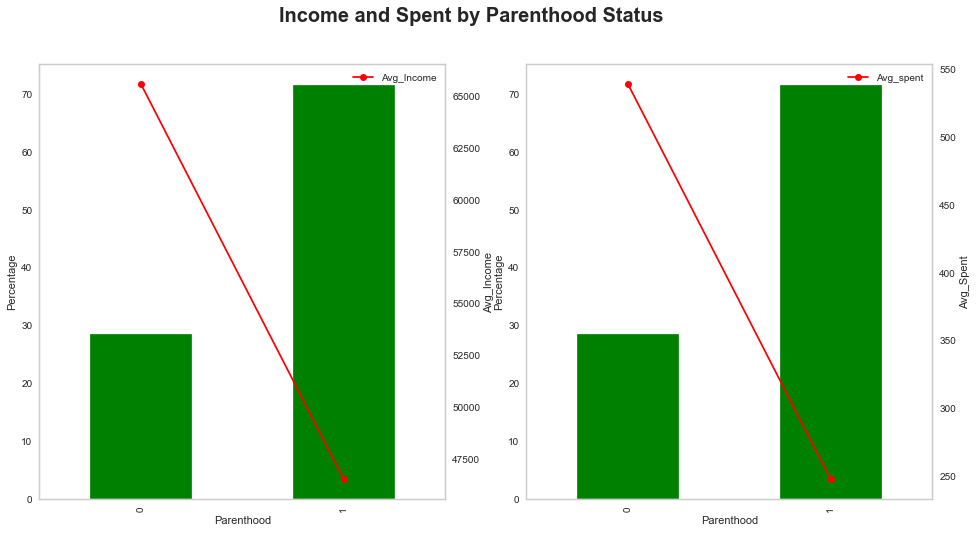

In [25]:
#children distribution
#Define data
age = data.groupby('Parenthood').agg({'ID':'count','Income':'mean','Total_Expenses':'mean'}).reset_index()
age.rename(columns = {'ID': 'count','Income':'Avg_Income','Total_Expenses':'Avg_spent'},inplace = True)   
age['Percentage_count']=round(age['count']/sum(age['count'])*100,1)


sns.set_style("whitegrid", {'axes.grid' : False})
fig,axes= plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Income and Spent by Parenthood Status', fontsize = 20, fontweight ='bold')

#sns barplot age vs income
ax= age.plot(kind ='bar',x= 'Parenthood', y='Percentage_count', color = 'green',legend = False,ax=axes[0])
ax2 = ax.twinx()
age.plot(x='Parenthood',y='Avg_Income', ax=ax2, legend = True, color='red', marker='o' )
ax.set_ylabel ('Percentage')
ax2.set_ylabel('Avg_Income')

#sns barplot age vs spent
ax1=age.plot(kind='bar',x='Parenthood',y='Percentage_count',legend = False, color = 'green',ax=axes[1])
ax3 = ax1.twinx()
age.plot(x='Parenthood',y='Avg_spent', ax=ax3, legend = True, color='red', marker='o' )
ax1.set_ylabel ('Percentage')
ax3.set_ylabel('Avg_Spent')


Observation: 
- The majority of customers are ranged between 40-60 years old. However, the highest income and spent belongs to customers at 70+ and 18-29 years old. 
- About half of the customers held Undergraduate degrees, followed by Postgraduate and Graduated levels. Postgraduate customers have the highest average income and spending
- Even about 70% of customers are in a relationship and have at least one child in the house, but the average income and spending of Single customers are much higher than those In Relationship customers

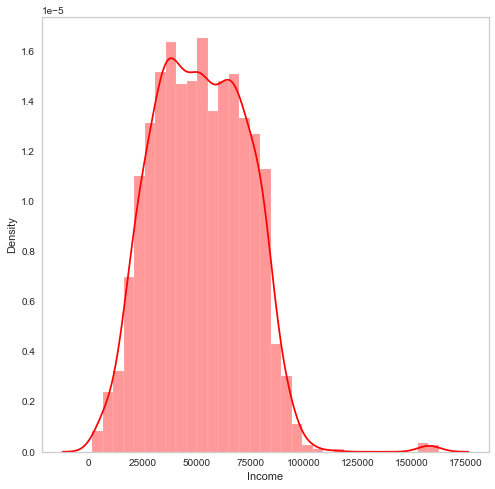

In [26]:
#Income distribution
plt.figure(figsize = (8,8))
sns.distplot(data['Income'], color = 'red')
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Total_Expenses'>

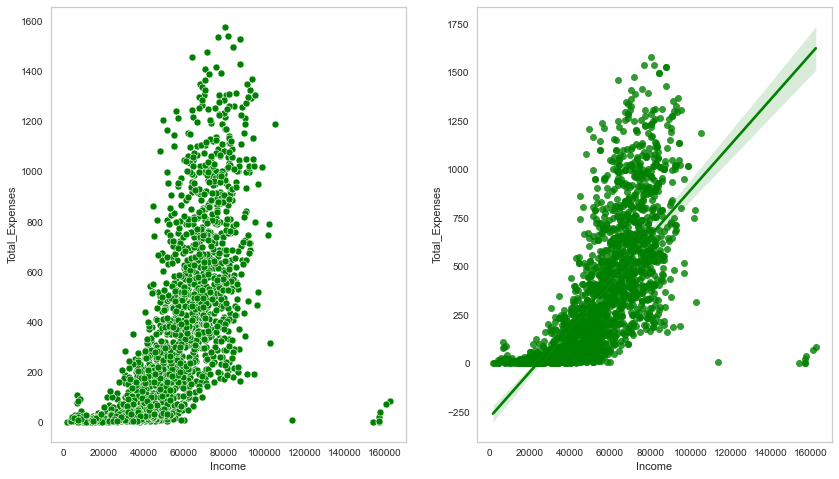

In [27]:
#Income vs Expenses
fig, axes = plt.subplots(1,2,figsize = (14,8))
sns.scatterplot(x=data['Income'],y=data['Total_Expenses'],ax=axes[0],color='green')
sns.regplot(x=data['Income'],y=data['Total_Expenses'],ax = axes[1],color='green')

Income and Spending has positive correlation, the higher customer's income, the higher customer's spending.

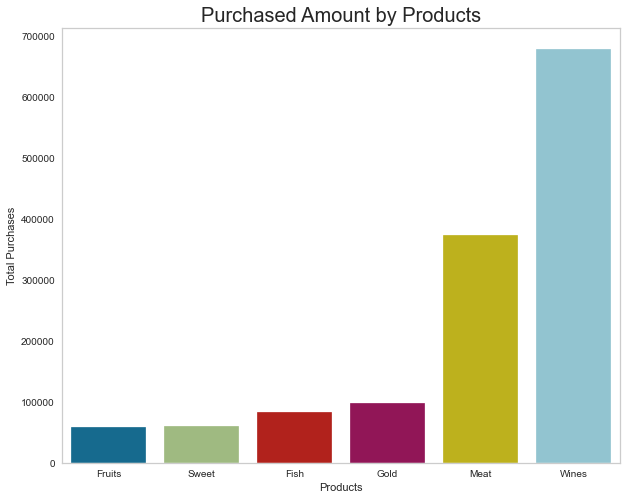

In [28]:
#Purchases in each product listed
pro_data = data[['Wines','Fish','Meat','Sweet','Gold','Fruits']]
pro_data = pro_data.sum(axis = 0).reset_index(name = 'Purchased_amount').sort_values('Purchased_amount')
pro_data.rename(columns={'index':'products'}, inplace = True)

#sns barplot
plt.figure (figsize = (10,8))
ax=sns.barplot(x='products',y='Purchased_amount', data=pro_data, ci=None, order = pro_data['products'])
ax.set_title ('Purchased Amount by Products',fontsize =20)
ax.set_xlabel('Products')
ax.set_ylabel('Total Purchases')
plt.show()

Wines are the most popular products that accouted for the highest customer's purchases.

Text(0.5, 1.0, 'Purchases via Different Channels')

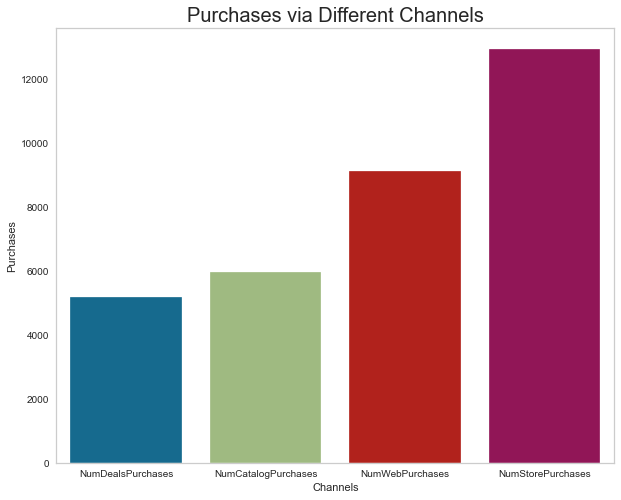

In [29]:
#Total amount of purchases via channels
channel_data=data[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
channel_data=channel_data.sum(axis=0).reset_index(name='Purchases').sort_values('Purchases')
channel_data= channel_data.rename(columns={'index':'Channels'})

#sns barplot
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Channels',y='Purchases',data=channel_data,ci=None, order = channel_data['Channels'])
ax.set_title('Purchases via Different Channels',fontsize=20)

Purchasing in Store seems to be a preferred option by customers, followed by Web, catalog, and deals purchases.

Text(0.5, 1.0, 'Acceptances in Different Promotion Campaigns')

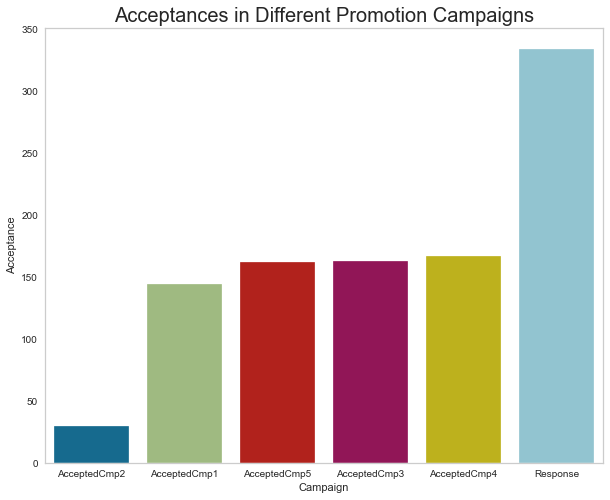

In [30]:
#Total number of acceptances in each promotion campaign
Promo_data=data[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response' ]]
Promo_data=Promo_data.sum(axis=0).reset_index(name='Acceptance').sort_values('Acceptance')
Promo_data= Promo_data.rename(columns={'index':'Campaign'})

#sns barplot
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Campaign',y='Acceptance',data=Promo_data,ci=None, order = Promo_data['Campaign'])
ax.set_title('Acceptances in Different Promotion Campaigns',fontsize=20)


The number of acceptance for the last promotion campaign significantly increased compared to that of the previous ones

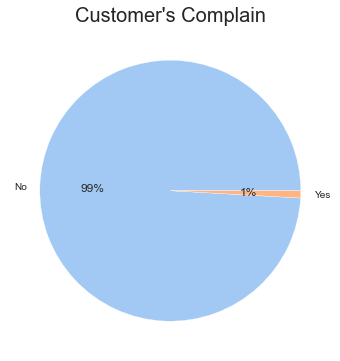

In [31]:
#checking number of unique categories in complain
Complain_data = data['Complain'].value_counts()
Complain_data

# define sns color palette
labels = ['No','Yes']
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.figure (figsize = (10,6))
plt.pie(Complain_data, labels = labels, colors = colors, autopct ='%.0f%%')
plt.title ("Customer's Complain", fontsize =20)
plt.show()

# Clustering  

In this section, I will perform the following steps: 
- Label encode catogorical data
- Scale the data features using standard scaler
- Reduce the dimensions
- Determine the number of clusters to perform using Elbow method
- Profile the created clusters

In [32]:
#Label encoding the categorical data

#Get list of categorical attribute
obj_cols = data.select_dtypes(include=['object']).columns.tolist()

#label encode the obj dtypes
LE=LabelEncoder()
for i in obj_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print ('All features are numerical')

All features are numerical


In [33]:
#Scaling data features
#create copy of data
df=data.copy()

#Drop some features on deals accepted and promotions
cols_del=['ID', 'Age_Group','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df= df.drop(cols_del,axis=1)

#scaling 
scaler = StandardScaler()
scaler.fit(df)
scaled_df= pd.DataFrame(scaler.transform(df),columns = df.columns)

print('All features are scaled')

All features are scaled


In [34]:
# Reducing the dimensions to 3
pca=PCA(n_components=3)
pca.fit(scaled_df)
PCA_df= pd.DataFrame(pca.transform(scaled_df), columns = (['c1','c2','c3']))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
c1,2236.0,1.231374e-17,2.674411,-5.457564,-2.436902,-0.786459,2.298203,7.342629
c2,2236.0,8.341568e-18,1.473846,-3.787597,-1.006827,-0.228749,0.919016,5.601223
c3,2236.0,-2.815279e-17,1.136382,-3.231973,-0.765847,-0.009953,0.750540,5.132920


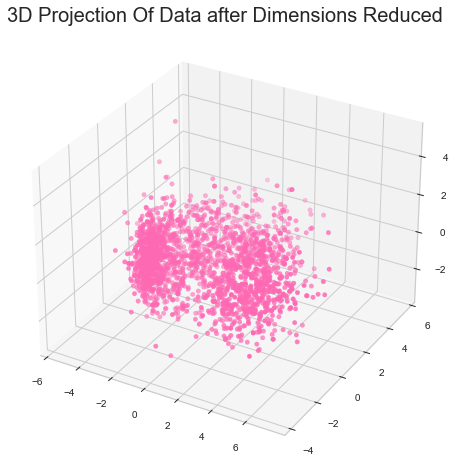

In [35]:
#plot the data after dimension reduced
x=PCA_df['c1']
y=PCA_df['c2']
z=PCA_df['c3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c='hotpink', marker="o" )
ax.set_title("3D Projection Of Data after Dimensions Reduced", fontsize = 20)
plt.show()

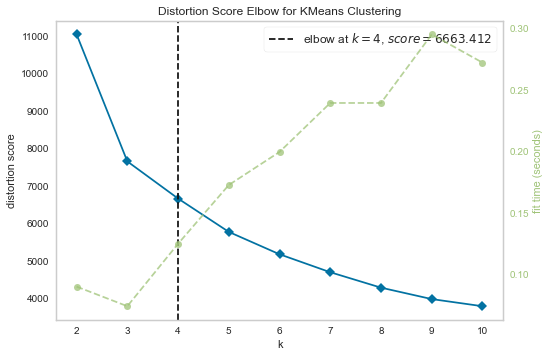

In [36]:
# Performing Elbow method
elb = KElbowVisualizer(KMeans(), k=10)
elb.fit(PCA_df)
elb.show();

4 is the optimal clusters determined using Elbow method

In [37]:
# Fit the number of clusters into the K_Means model
# Training a predicting using K-Means Algorithm.
kmeans=KMeans(n_clusters=4).fit(PCA_df)
pred=kmeans.predict(PCA_df)
PCA_df['Clusters'] =kmeans.labels_

# Appending those cluster value into main dataframe (without standard-scalar)
data['Clusters'] = pred + 1

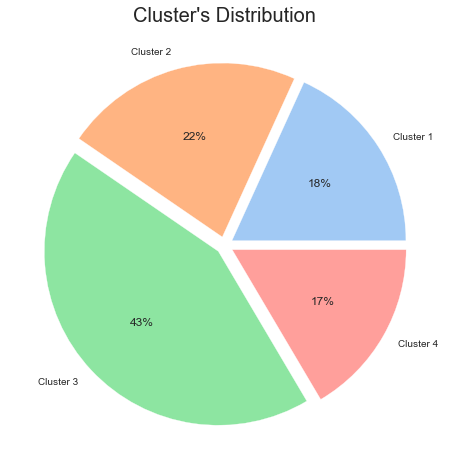

In [38]:
# Results
clusters_count = data['Clusters'].value_counts()                                                   
clusters_count = clusters_count.to_frame().reset_index().sort_values('index',ascending=True) 
clusters_count.columns = ['Clusters', 'count']                                                     

# define sns color palette
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']
colors = sns.color_palette('pastel')[0:4]

#create pie chart
plt.figure (figsize = (12,8))
plt.pie(clusters_count['count'],explode=(0.05, 0.05, 0.05,0.05),labels = labels, colors = colors, autopct ='%.0f%%')
plt.title ("Cluster's Distribution", fontsize =20)
plt.show()

43% of Customers belong to Cluster 3. Following by Cluster 2,1,and 4 with fairly distributions of 22%, 18%, and 17%, respectively

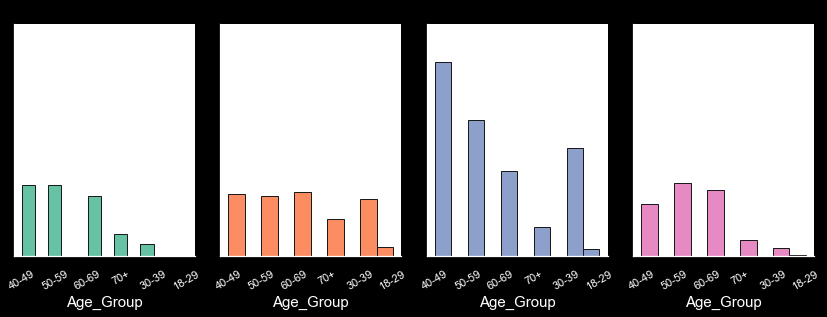

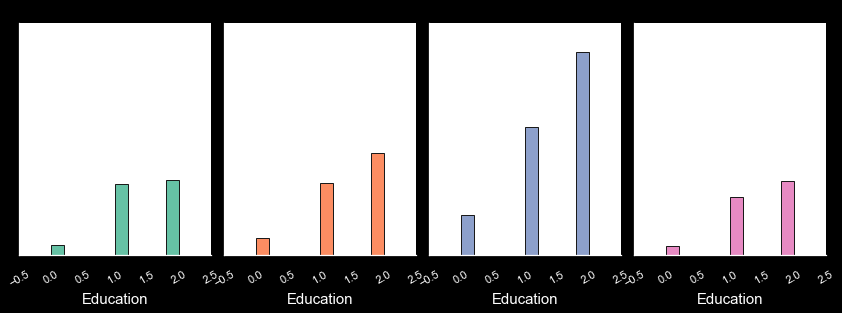

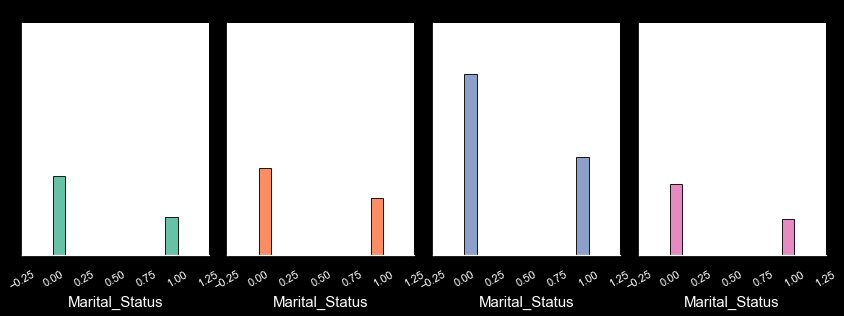

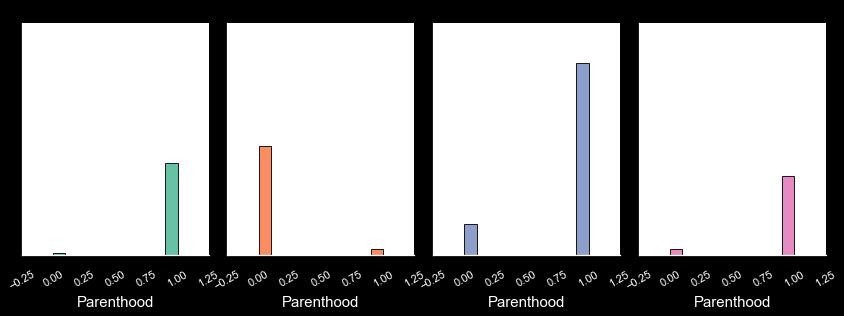

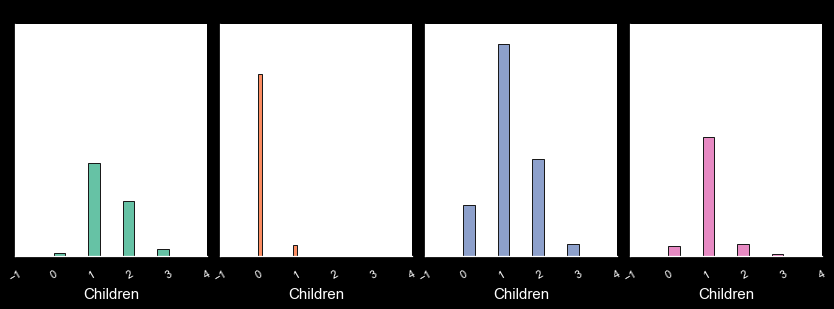

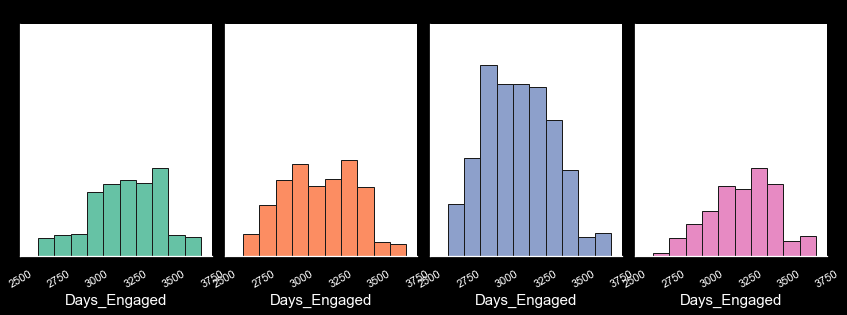

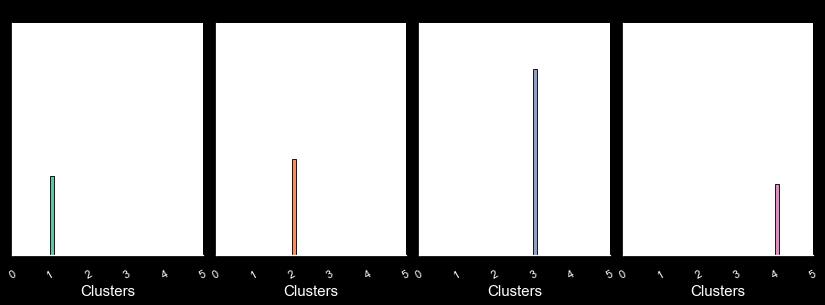

In [47]:
#Cluster's profiling

#Customer's personality
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'black', 'axes.grid' : False})
Personal = data[['Age_Group','Education','Marital_Status','Parenthood','Children','Days_Engaged','Clusters']]
for i in Personal:
    g = sns.FacetGrid(Personal, col = "Clusters", hue = "Clusters", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = 'black', fontweight="bold")
    g.fig.set_figheight(5)

<AxesSubplot:xlabel='Total_Expenses', ylabel='Income'>

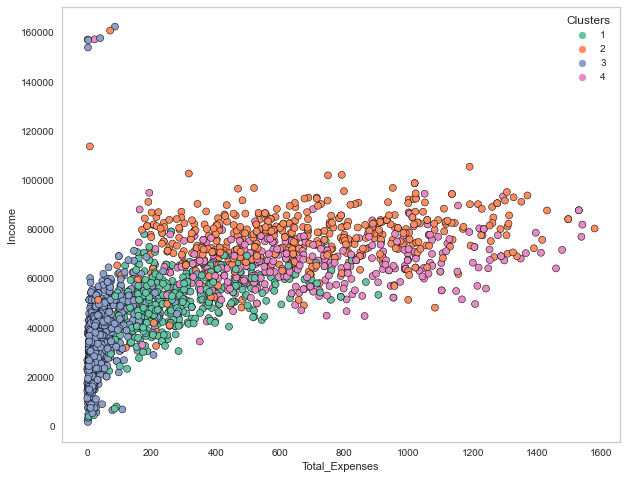

In [40]:
plt.figure(figsize = (10,8))
sns.scatterplot(x=data['Total_Expenses'],y=data['Income'],hue=data['Clusters'],
                palette = 'Set2',sizes = (1, 8), linewidth = 0.5, edgecolor = "black")

Customer's grouping based on income and spent
- Group 1: average income and average spending
- Group 2: high income and high spending
- Group 3: average income and low spending
- Group 4: average income and high spending

Next I will visualize the distribution of each cluster on spent, purchasing options, and promotion campaign to asnwer the following questions: 
- Which customer's segmentations accounted for the highest spent?
- Which customer's segmentation accounted for the highest deal purchases
- Which customer's segmentation participated the promotions the most 

Text(0.5, 1.0, 'Spent by Clusters')

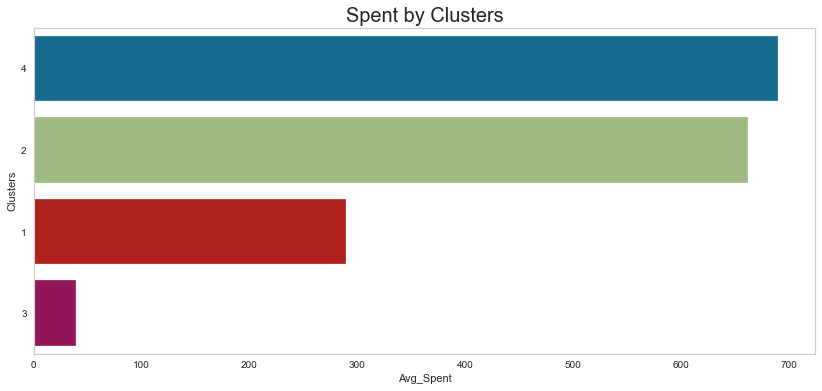

In [41]:
#Spent by each customer's segmentation
clus = data.groupby('Clusters')['Total_Expenses'].mean().round(1).reset_index(name='Avg_Spent').sort_values('Avg_Spent',ascending = False)

#sns barplot
plt.figure(figsize = (14,6))
ax=sns.barplot(x='Avg_Spent',y='Clusters',data=clus,orient='h',order =clus['Clusters'])
ax.set_title('Spent by Clusters', fontsize = 20)

Customers group 4 and 2 have the highest spending values

<Figure size 720x576 with 0 Axes>

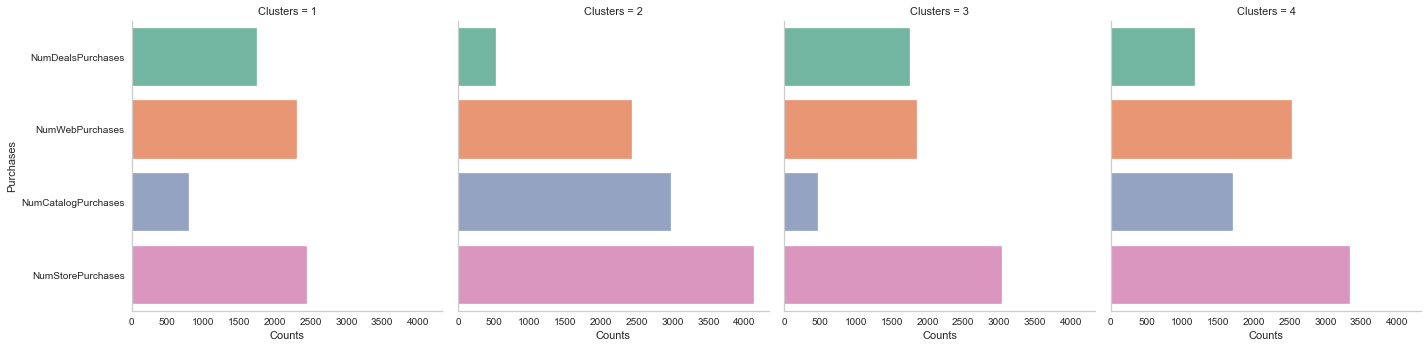

In [42]:
#Purchasing habit by clusters
purchase_data = data.groupby('Clusters')[['NumDealsPurchases','NumWebPurchases',
                                        'NumCatalogPurchases','NumStorePurchases']].sum().reset_index()

purchase_data = pd.melt(purchase_data,id_vars = 'Clusters',var_name='Purchases', value_name="Counts")


plt.figure(figsize = (10,8))    
sns.factorplot('Counts','Purchases',col='Clusters',data = purchase_data,kind = 'bar',palette = "Set2")

Purchasing at the store was preferred by the customer in all groups. Customer group 2 also liked purchasing via catalog and not preferred deal options.

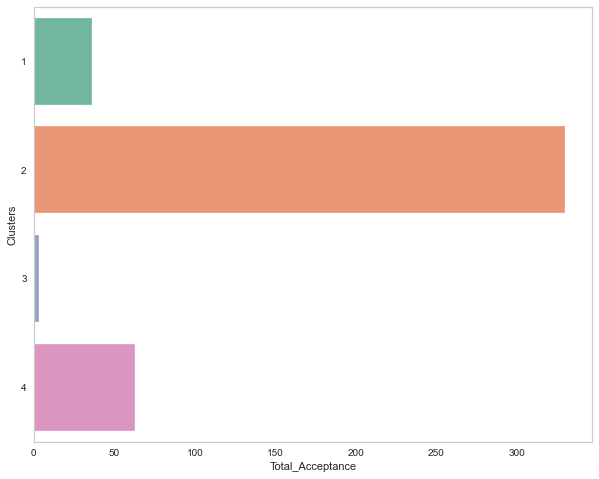

In [43]:
#Promotion acceptance by clusters
data['Total_Acceptance'] = data['AcceptedCmp1']+data['AcceptedCmp1']+data['AcceptedCmp1']
+data['AcceptedCmp1']+data['AcceptedCmp1']+data['Response']

promo_data = data.groupby('Clusters')['Total_Acceptance'].sum().reset_index()
promo_data

plt.figure(figsize = (10,8)) 
ax= sns.barplot(data = promo_data,x='Total_Acceptance', y='Clusters',orient ='h',palette ='Set2')

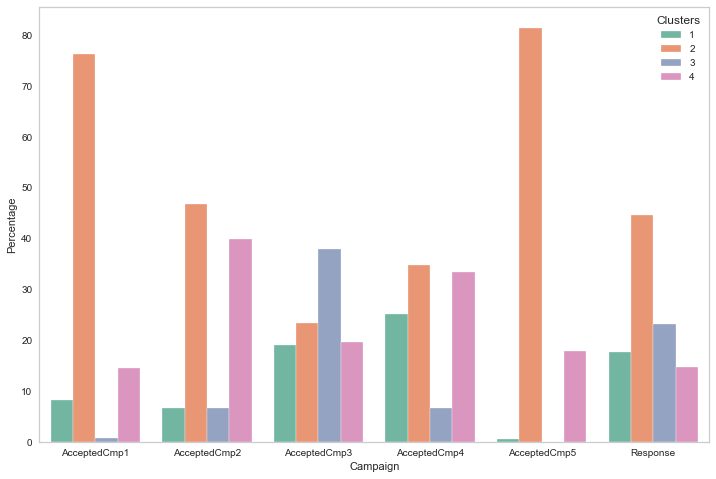

In [44]:
#Promotion participation by each customer's segmentation
df= data.groupby(['Clusters']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                                    'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                                    'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index()
df.rename(columns = {'level_1':'Campaign', 0 :'Value'},inplace=True)
df['Sum'] = df.groupby(['Campaign'])['Value'].transform('sum')
df['Percentage']=round(df['Value']/df['Sum']*100,1)
df=df.sort_values(['Campaign','Percentage'],ascending = [True,False])

plt.figure(figsize = (12,8))
ax=sns.barplot(data=df,x='Campaign',y='Percentage',hue= 'Clusters', palette='Set2')

Interestingly, customer group 2 was the most active group when the percentage of attending promotion campaigns was much higher than the other groups.